In [30]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import time

from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog

from lesson_functions import *

from sklearn.cross_validation import train_test_split

from sklearn.externals import joblib
from scipy.ndimage.measurements import label

# Step 1: Load Trained Model

In [31]:
Model_Info = joblib.load('Trained_Models/model1.pkl')
svc = Model_Info['svc']
setting =Model_Info['setting']

colorspace     = setting['colorspace']
use_spatial    = setting['use_spatial']
spatial_size   = setting['spatial_size']
use_hist       = setting['use_hist']
hist_bins      = setting['hist_bins']
use_hog        = setting['use_hog']
orient         = setting['orient']
pix_per_cell   = setting['pix_per_cell']
cell_per_block = setting['cell_per_block']
hog_channel    = setting['hog_channel']
X              = setting['X']
X_scaler       = setting['X_scaler']
scaled_X       = setting['scaled_X']
y              = setting['y']
accuracy       = setting['accuracy']

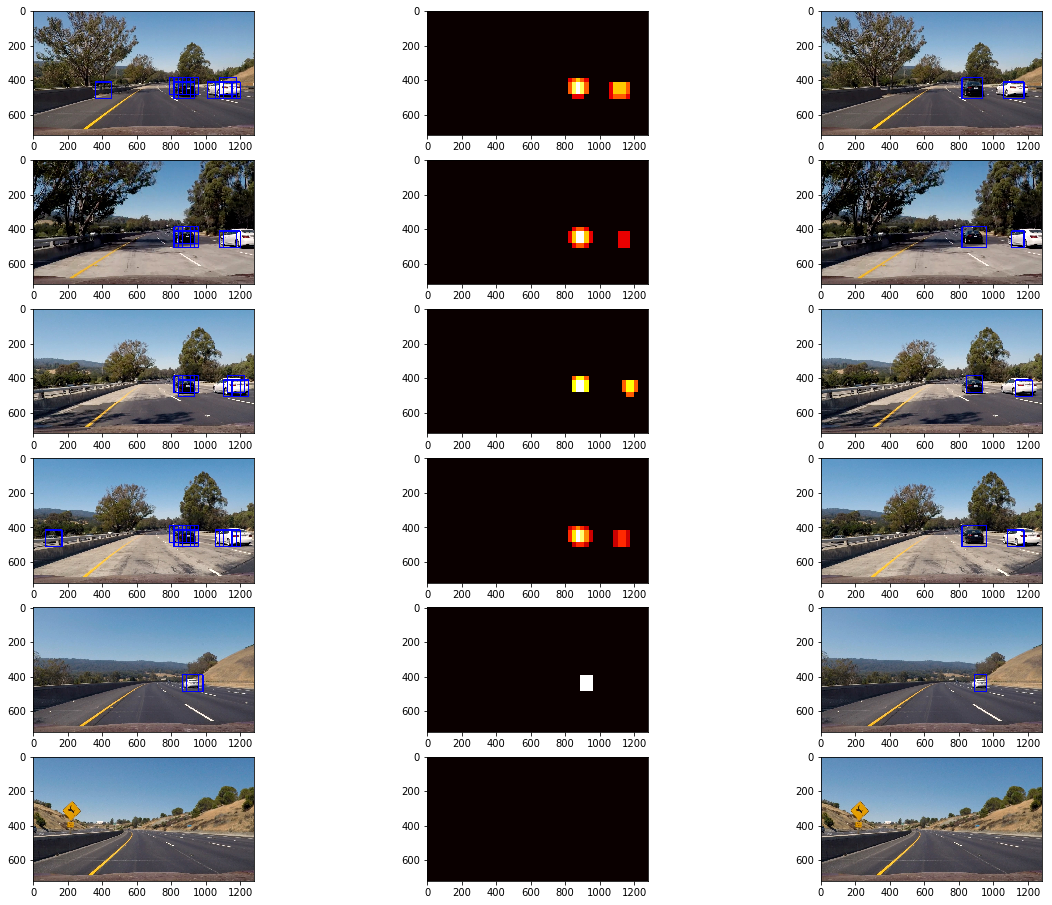

In [32]:

test_images_filename = glob.glob('test_images/*.jpg')

# -----------------------------------------------------------------------------------------
count = -1
ind_plot = 1
if(ind_plot):
    f, axes = plt.subplots(6, 3, figsize=(20,16) )


ystart = 390
ystop  = 640
scale  = 1.5
heat_threshold = 1.0

for ii in range(0,6):
    for jj in range(0,3):
        count = ii

        image = mpimg.imread(test_images_filename[count])

        # out_img = find_cars2(image, ystart, ystop, scale, svc2, X_scaler2, orient2, pix_per_cell2, cell_per_block2,
        #                     spatial_size2, hist_bins2)

        out_img = find_cars(image, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block,
                             spatial_size, hist_bins)

        out_img2, list_car_windows2 = find_cars2(image, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block,
                                                spatial_size, hist_bins)


        heat = np.zeros_like(image[:,:,0]).astype(np.float)
        box_list = list_car_windows2
        heat = add_heat(heat, box_list)
        heat = apply_threshold(heat, heat_threshold) #1
        heatmap = np.clip(heat, 0, 255)
        labels = label(heatmap)
        draw_img = draw_labeled_bboxes(np.copy(image), labels)

        if(ind_plot):
            axes[ii,0].imshow(out_img)
            axes[ii,1].imshow(heatmap, cmap='hot')
            axes[ii,2].imshow(draw_img)
            #axes[ii,3].imshow(out_img3)
            
plt.show()

In [39]:
ystart = 380
ystop  = 640
scale  = 1.5
heat_threshold = 0.3 #1.5/30

from functools import reduce

class Heat_AllFrames():
    def __init__(self):
        self.heat_allframes = []

    
def video_pipeline2(image):

    global Heat_AllFrames_Obj
    Heat_AllFrames_Obj = Heat_AllFrames()
    
    out_img, list_car_windows = find_cars2(image, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block,
                                                spatial_size, hist_bins)
    
    heat = np.zeros_like(image[:, :, 0]).astype(np.float)
    box_list = list_car_windows
    heatmap = add_heat(heat, box_list)
    
    n = 5
    if (len(Heat_AllFrames_Obj.heat_allframes) >= n):
        Heat_AllFrames_Obj.heat_allframes = Heat_AllFrames_Obj.heat_allframes[1:]

    Heat_AllFrames_Obj.heat_allframes.append(heatmap)
    heat_history = reduce(lambda x, y : x + y, Heat_AllFrames_Obj.heat_allframes)/n
    heatmap = apply_threshold(heat_history, heat_threshold)
    labels = label(heatmap)

    draw_img = draw_labeled_bboxes(np.copy(image), labels)

    return draw_img

In [40]:
# video_output = 'test_video2_output.mp4';
# clip1 = VideoFileClip("test_video2.mp4");
# video_output_clip = clip1.fl_image(video_pipeline2); #NOTE: this function expects color images!!
# %time video_output_clip.write_videofile(video_output, audio=False);


video_output = 'project_video_output.mp4';
clip1 = VideoFileClip("project_video.mp4");
video_output_clip = clip1.fl_image(video_pipeline2); #NOTE: this function expects color images!!
%time video_output_clip.write_videofile(video_output, audio=False);

print("Project Completed :)")

[MoviePy] >>>> Building video project_video_output.mp4
[MoviePy] Writing video project_video_output.mp4


100%|█████████▉| 1260/1261 [05:45<00:00,  3.62it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_output.mp4 

CPU times: user 5min 37s, sys: 14.7 s, total: 5min 52s
Wall time: 5min 46s
Project Completed :)


In [ ]:

# def video_pipeline(image):

#     import collections
#     #heatmaps = collections.deque(maxlen=30)
    
#     out_img, list_car_windows = find_cars2(image, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block,
#                                                 spatial_size, hist_bins)

#     heat = np.zeros_like(image[:, :, 0]).astype(np.float)

#     box_list = list_car_windows
#     heat = add_heat(heat, box_list)
    
# #     heatmaps.append(heat)
# #     heatmap_avg = sum(heatmaps)/30
# #     weight = 0.5
# #     if (len(heatmaps) == 2):
# #         heatmap_avg = weight*heatmaps[-1] + (1-weight)*heatmaps[0] 
# #     else:
# #         heatmap_avg = 1*heatmaps[-1]    
    
#     heat = apply_threshold(heat, heat_threshold) #1
#     #heat = apply_threshold(heatmap_avg, heat_threshold) #1
#     heatmap = np.clip(heat, 0, 255)
#     labels = label(heatmap)
#     draw_img = draw_labeled_bboxes(np.copy(image), labels)

#     return draw_img

In [ ]:
# from moviepy.editor import VideoFileClip

# video_output = 'project_video_output.mp4';
# ## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
# ## To do so add .subclip(start_second,end_second) to the end of the line below
# ## Where start_second and end_second are integer values representing the start and end of the subclip
# ## You may also uncomment the following line for a subclip of the first 5 seconds
# ##clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(0,5)
# clip1 = VideoFileClip("project_video.mp4");
# video_output_clip = clip1.fl_image(video_pipeline); #NOTE: this function expects color images!!
# %time video_output_clip.write_videofile(video_output, audio=False);

# # video_output = 'test_video2_output.mp4';
# # ## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
# # ## To do so add .subclip(start_second,end_second) to the end of the line below
# # ## Where start_second and end_second are integer values representing the start and end of the subclip
# # ## You may also uncomment the following line for a subclip of the first 5 seconds
# # ##clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(0,5)
# # clip1 = VideoFileClip("test_video2.mp4");
# # video_output_clip = clip1.fl_image(video_pipeline); #NOTE: this function expects color images!!
# # %time video_output_clip.write_videofile(video_output, audio=False);

# print("Project Completed :)")